In [28]:
from xml.etree import ElementTree
from geolite2 import geolite2 #installed using -> pip install maxminddb-geolite2
import pycountry

In [29]:
dom = ElementTree.parse('http.xml')
root = dom.getroot()
countries = list()
IPList = list()

In [30]:
res1 = root.findall("packet/proto[@name='http']/field[@name='http.x_forwarded_for']..")
res2 = root.findall("packet/proto[@name='http']/field[@showname='Via: Internet.org\\r\\n']..")

In [31]:
res3 = list(set(res1) & set(res2)) 

In [34]:
for proto in res3:
    field = proto.findall("field[@name='http.x_forwarded_for']")
    print(field.attrib['show'])

AttributeError: 'list' object has no attribute 'attrib'

In [ ]:
IPList = set(IPList)
print(len(IPList))

In [81]:
protos = root.findall("packet/proto[@name='http']")
for item in protos:
    temp_IP=0
    for field in item.iterfind('field'):
        if(field.attrib['name'] == 'http.x_forwarded_for'):
            temp_IP = field.attrib['show']
            break
            
    for field in item.iterfind('field'):
        if(field.attrib['name']=='http.request.line' and field.get('showname') == "Via: Internet.org\\r\\n"):
            IPList.append(temp_IP)
            break

In [84]:
IPList = set(IPList)
print(len(IPList))

481


In [85]:
for IP in IPList:
    country = (geolite2.reader().get(IP))['country']['names']['en']
    countries.append(country.upper())

In [86]:
output = dict((x,countries.count(x)) for x in set(countries))
output = dict(sorted(output.items(), key=lambda item: item[1]))

In [87]:
import csv
with open('data.csv', 'w') as csv_file:
    writer = csv.writer(csv_file)
    for key, value in output.items():
        writer.writerow([key, value])

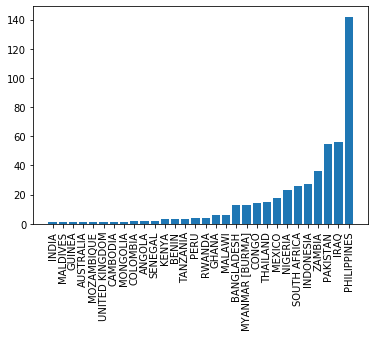

<Figure size 144000x72000 with 0 Axes>

In [88]:
import matplotlib.pyplot as plt

plt.bar(range(len(output)), list(output.values()), align='center')
plt.xticks(range(len(output)), list(output.keys()),rotation=90)
plt.figure(figsize=(2000,1000))
plt.show()

In [89]:
type(dom)

xml.etree.ElementTree.ElementTree

In [21]:
len(IPList)

482